In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
# Load the dataset (replace 'your_dataset.csv' with the actual dataset path)
data = pd.read_csv('supply_chain_data.csv')

# Data Exploration and Cleaning
print("Data Overview:")
print(data.info())



Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location    

In [2]:
# Handling Missing Values
data = data.dropna()

# Descriptive Statistics
print("\nDescriptive Statistics:")
print(data.describe())




Descriptive Statistics:
            Price  Availability  Number of products sold  Revenue generated  \
count  100.000000    100.000000               100.000000         100.000000   
mean    49.462461     48.400000               460.990000        5776.048187   
std     31.168193     30.743317               303.780074        2732.841744   
min      1.699976      1.000000                 8.000000        1061.618523   
25%     19.597823     22.750000               184.250000        2812.847151   
50%     51.239831     43.500000               392.500000        6006.352023   
75%     77.198228     75.000000               704.250000        8253.976921   
max     99.171329    100.000000               996.000000        9866.465458   

       Stock levels  Lead times  Order quantities  Shipping times  \
count    100.000000  100.000000        100.000000      100.000000   
mean      47.770000   15.960000         49.220000        5.750000   
std       31.369372    8.785801         26.784429       

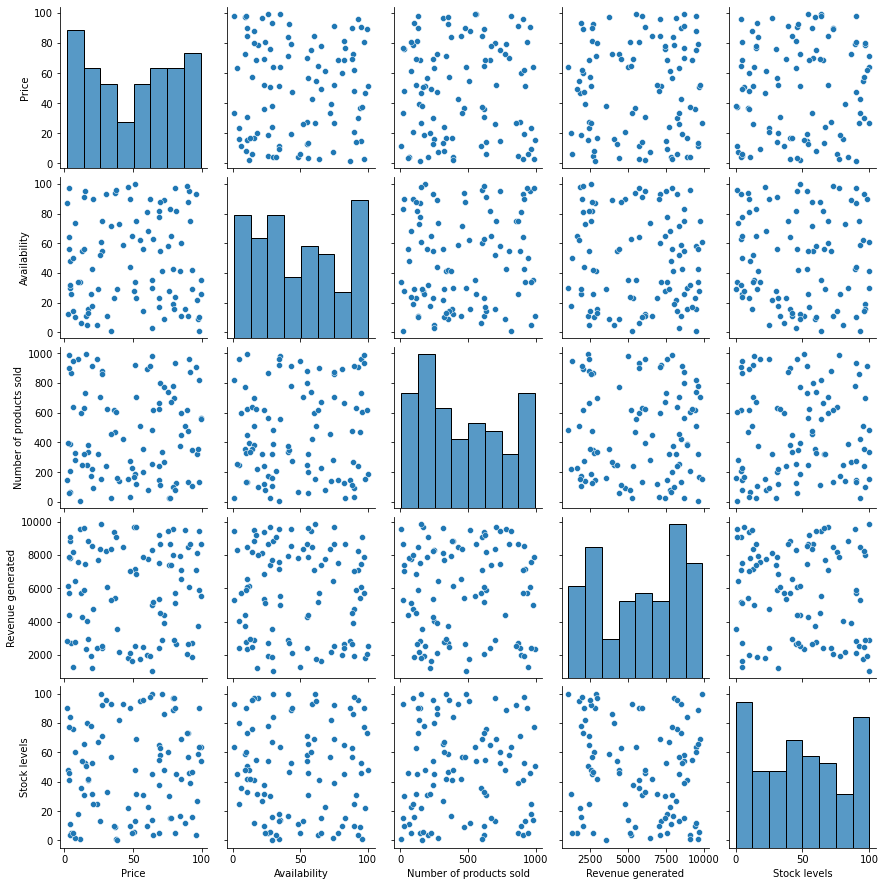

In [3]:
# Data Visualization
# Pairplot for numeric variables
sns.pairplot(data[['Price', 'Availability', 'Number of products sold', 'Revenue generated', 'Stock levels']])
plt.show()




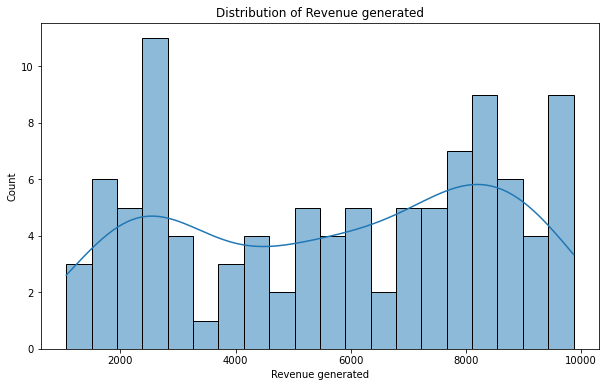

In [4]:
# Distribution of 'Revenue generated'
plt.figure(figsize=(10, 6))
sns.histplot(data['Revenue generated'], bins=20, kde=True)
plt.title('Distribution of Revenue generated')
plt.show()

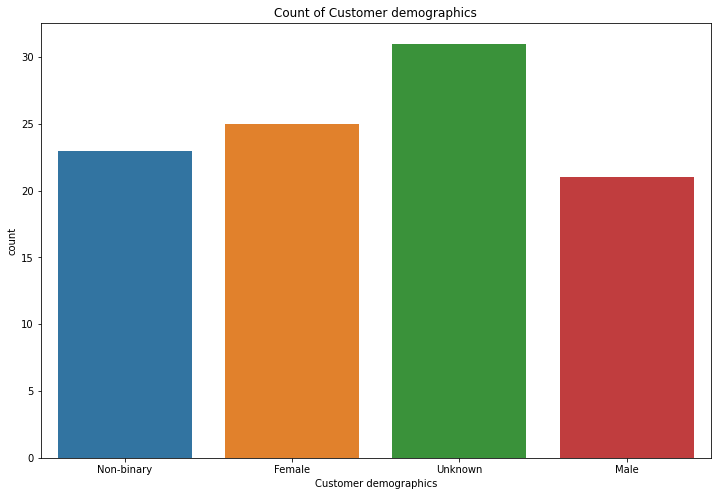

In [12]:
# Countplot for categorical variables
plt.figure(figsize=(12, 8))
sns.countplot(x='Customer demographics', data=data)
plt.title('Count of Customer demographics')
plt.show()


In [6]:
# Feature Engineering (if necessary)
# Example: Creating a new feature 'Profit' by subtracting 'Costs' from 'Revenue'
data['Profit'] = data['Revenue generated'] - data['Costs']



In [7]:
# Machine Learning (Regression Example)
# Assuming we want to predict 'Revenue generated' based on other features
X = data.drop(['Revenue generated'], axis=1)
y = data['Revenue generated']

In [8]:
# Convert categorical variables to numerical using one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)


In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Feature Scaling for numeric variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include=np.number))
X_test_scaled = scaler.transform(X_test.select_dtypes(include=np.number))

# Train models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor()
}

for model_name, model in models.items():
    print(f"\nTraining {model_name}:")
    model.fit(X_train_scaled, y_train)

    # Make predictions on the test set
    predictions = model.predict(X_test_scaled)

    # Evaluate the model
    mse = mean_squared_error(y_test, predictions)
    accuracy = model.score(X_test_scaled, y_test)  # Calculate accuracy (R^2 score)
    
    print(f"Mean Squared Error for {model_name}: {mse}")
    print(f"Accuracy for {model_name}: {accuracy:.2f}")


# Feature Importance for Random Forest Regressor
rf_model = models['Random Forest Regressor']
feature_importance_rf = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': rf_model.feature_importances_})
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)
print("\nFeature Importance for Random Forest Regressor:")
print(feature_importance_rf)


Training Linear Regression:
Mean Squared Error for Linear Regression: 2514779.1928772773
Accuracy for Linear Regression: 0.69

Training Random Forest Regressor:
Mean Squared Error for Random Forest Regressor: 225560.30058570634
Accuracy for Random Forest Regressor: 0.97

Training Gradient Boosting Regressor:
Mean Squared Error for Gradient Boosting Regressor: 83407.09551736593
Accuracy for Gradient Boosting Regressor: 0.99

Feature Importance for Random Forest Regressor:
                Feature  Importance
14               Profit    0.989859
13                Costs    0.001480
9    Production volumes    0.000918
1          Availability    0.000581
4            Lead times    0.000552
..                  ...         ...
90            SKU_SKU76    0.000000
87            SKU_SKU73    0.000000
112           SKU_SKU96    0.000000
106           SKU_SKU90    0.000000
95            SKU_SKU80    0.000000

[136 rows x 2 columns]
